In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 

In [3]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Calculation of Determinant

For $2\times 2$ matrix $\pmb A$, the algorithm of determinant is
$$
\pmb A=\left[\begin{matrix} a & b\cr c & d \end{matrix}\right] \qquad\text{then}\qquad \text{det}\pmb A=ad-bc
$$

In [6]:
a, b, c, d, e, f, g, h, i = sy.symbols('a, b, c, d, e, f, g, h, i', real = True)

With defined symbols, the algorithms of $2\times 2$ and $3\times 3$ determinants are

In [7]:
A = sy.Matrix([[a, b], [c, d]])
A.det()

In [8]:
B = sy.Matrix([[a, b, c], [d, e, f], [g, h, i]])
B.det()

## <font face="gotham" color="purple"> Cofactor Expansion

 The $(i,j)$-<font face="gotham" color="red">cofactor</font> of $\pmb A$ is denoted as $C_{ij}$ given by
 $$C_{i j}=(-1)^{i+j} \operatorname{det} A_{i j} = (-1)^{i+j} M_{ij}$$
 where $M_{ij}$ is the <font face="gotham" color="red">minor determinant</font> which excludes $i$th row and $j$th column.

Consider a matrix $\pmb A$
$$A=\left[\begin{array}{rrr}
1 & 5 & 0 \\
2 & 4 & -1 \\
0 & -2 & 0
\end{array}\right]$$
The cofactor expansion looks like this
$$\begin{aligned}
\operatorname{det} A &=1 \cdot \operatorname{det}\left[\begin{array}{rr}
4 & -1 \\
-2 & 0
\end{array}\right]-5 \cdot \operatorname{det}\left[\begin{array}{cc}
2 & -1 \\
0 & 0
\end{array}\right]+0 \cdot \operatorname{det}\left[\begin{array}{rr}
2 & 4 \\
0 & -2
\end{array}\right] \\
&=1(0-2)-5(0-0)+0(-4-0)=-2
\end{aligned}$$

The scalers in front of each smaller determinant is the first row of $\pmb A$ and the smaller determinants are the cofactors of $\pmb A$.

In general, the expansions across $i$th row or $j$th column are
$$
\operatorname{det} A=a_{i 1} C_{i 1}+a_{i 2} C_{i 2}+\cdots+a_{i n} C_{i n}
$$
$$
\operatorname{det} A=a_{1 j} C_{1 j}+a_{2 j} C_{2 j}+\cdots+a_{n j} C_{n j}
$$

### <font face="gotham" color="purple"> A SymPy Example

Consider the matrix below and perform a cofactor expansion

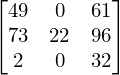

In [20]:
A = sy.Matrix([[49, 0, 61], [73, 22, 96], [2, 0, 32]]);A

Cofactor exapansion with the column which has two zero(s): 

$$\operatorname{det} A = a_{12}(-1)^{1+2}C_{12}+a_{22}(-1)^{2+2}C_{22}+a_{32}(-1)^{3+2}C_{32}$$

We can use SymPy function for calculationg minors: ```sy.matrices.MatrixDeterminant.minor(A, i, 1)```. We can define a function for cofactor row expansion:

In [53]:
def cof_exp(matrix, c): # c is the col that we want to expand
    detA = 0
    for i in range(matrix.shape[1]): # matrix.shape[1] is the number of columns
        detA += matrix[i, c]*(-1)**(i+c)*sy.matrices.MatrixDeterminant.minor(matrix, i, c)
    return detA

In [54]:
cof_exp(A,1)

Or we can try a random matrix with the user-defined function.

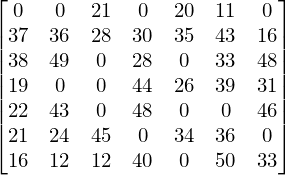

In [64]:
B = sy.randMatrix(r = 7, min=10, max=50, percent=70);B

In [65]:
cof_exp(B,1)

Then verify the result of using determinant method  ```.det()```. We can see indeed cofactor expansion works!

In [66]:
B.det()

<font face="gotham" color="red">Minor matrices</font> can also be extracted by using code ```sy.matrices.MatrixDeterminant.minor_submatrix()```, for instance, the $M_{23}$ matrix of $\pmb B$ is

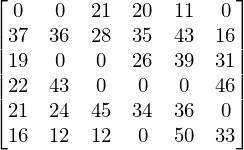

In [68]:
sy.matrices.MatrixDeterminant.minor_submatrix(B, 2, 3)

<font face="gotham" color="red">Cofactor matrix</font> is the matrix contain all cofactors of original matrix, and function ```.cofactor_matrix()``` can do the job.

$$A=\left[\begin{array}{rrr}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} \\
C_{31} & C_{32} & C_{33}
\end{array}\right]=
\left[\begin{array}{rrr}
(-1)^{1+1}M_{11} & (-1)^{1+2}M_{12} & (-1)^{1+3}M_{13} \\
(-1)^{2+1}M_{21} & (-1)^{2+2}M_{22} & (-1)^{2+3}M_{23} \\
(-1)^{3+1}M_{31} & (-1)^{3+2}M_{32} & (-1)^{3+3}M_{33}
\end{array}\right]
$$



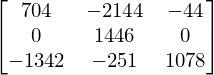

In [70]:
sy.matrices.MatrixDeterminant.cofactor_matrix(A)

## <font face="gotham" color="purple"> Triangular Matrix

If $\pmb A$ is triangular matrix, we can use cofactor expansion repetitively, the determinant of the matrix will be the product of the elements on the principal diagonal. 

$$
\operatorname{det}A_{n\times n} = \prod_{i=1}^n A_{ii}
$$

where $A_{ii}$ is the diagonal element.

Let's generate a random upper triangluar matrix.

In [75]:
A = np.round(np.random.rand(5,5)*100)
A_triu = np.triu(A); A_triu

array([[23., 74., 71., 67., 21.],
       [ 0., 44., 54., 43., 74.],
       [ 0.,  0., 64., 82., 91.],
       [ 0.,  0.,  0., 30., 19.],
       [ 0.,  0.,  0.,  0., 46.]])

In [76]:
np.linalg.det(A_triu)

Extract the diagonal by using ```np.diag()```, then calculate the product. It works as well!

In [77]:
A_diag = np.diag(A_triu)
np.prod(A_diag)

## <font face="gotham" color="purple"> Properties of Determinants

There are many properties of determinants, however they are mostly derived facts from cofactor expansion.
<font face="gotham" color="red"> 
    
1. Let $A$ be an $n×n$ square matrix. If one row of $A$ is multiplied by $k$ to produce the matrix $B$, then: $\text{det} B = k\, \text{det} A$.
2. Let $A$ be an $n×n$ square matrix. If two rows of $A$ are interchanged to produce a matrix $B$ , then $\text{det}B=-\text{det}A$.
3. Let $A$ be an $n×n$ square matrix. If a multiple of one row of $A$ is added to another row to produce the matrix $B$, then $\text{det}A=\text{det}B$.
4. If $A$ is an $n×n$ matrix, then $\text{det}A^T = \text{det}A$
5. A square matrix $A$ is invertible if and only if $\text{det}A\neq 0$
6. If $A$ and $B$ are $n×n$ matrices, then $\text{det}AB = (\text{det}{A})(\text{det}{B})$
7. If $A$ is an $n×n$ matrix and $k$ is a scalar, then $\text{det}\,kA=k^n\,\text{det}A$.
8. If $A$ is an invertible square matrix, then $\text{det}A^{-1}=\frac{1}{\det A}$.
</font>

All of them are straightforward, the key is to understand them in terms of cofactor expansion.

<font face="gotham" color="red">Proof of property 6</font>:
$$\begin{aligned}
|A B| &=\left|E_{p} \cdots E_{1} B\right|=\left|E_{p}\right|\left|E_{p-1} \cdots E_{1} B\right|=\cdots \\
&=\left|E_{p}\right| \cdots\left|E_{1}\right||B|=\cdots=\left|E_{p} \cdots E_{1}\right||B| \\
&=|A||B|
\end{aligned}$$

<font face="gotham" color="red">Proof of property 7</font>:

Because $\text{det} B = k\, \text{det} A$, one row of $A$ is multiplied by $k$ to produce $B$.Then multiply all the rows of $A$ by $k$, there will be $n$ $k$'s in front of $\text{det} A$, which is $k^n \text{det} A$

<font face="gotham" color="red">Proof of property 8</font>:
$$\begin{aligned}
&\begin{aligned}
A A^{-1} &=I \\
\left|A A^{-1}\right| &=|I|
\end{aligned}\\
&|A|\left|A^{-1}\right|=1\\
&\left|A^{-1}\right|=\frac{1}{|A|}
\end{aligned}$$

These properties are very useful in analytical derivation of some other theorems, however not useful in numerical sense.

# <font face="gotham" color="purple"> Cramer's Rule

For any $n\times n$ matrix $A$ and any $b$, denote $A_i(b)$ the matrix obtained from $A$ by replacing column $i$ by the vector $b$.

$$A_{i}(\mathbf{b})=\left[\begin{array}{lllll}
\mathbf{a}_{1} & \cdots & \mathbf{b} & \cdots & \mathbf{a}_{n}
\end{array}\right]$$

The <font face="gotham" color="red">Cramer's Rule</font> is 
$$x_{i}=\frac{\operatorname{det} A_{i}(\mathbf{b})}{\operatorname{det} A}, \quad i=1,2, \ldots, n$$

Proof：

$$\begin{aligned}
A \cdot I_{i}(\mathbf{x}) &=A\left[\mathbf{e}_{1} \quad \cdots \quad \mathbf{x} \quad \cdots \quad \mathbf{e}_{n}\right]=\left[\begin{array}{llllll}
A \mathbf{e}_{1} & \cdots & A \mathbf{x} & \cdots & A \mathbf{e}_{n}
\end{array}\right] \\
&=\left[\begin{array}{llllll}
\mathbf{a}_{1} & \cdots & \mathbf{b} & \cdots & \mathbf{a}_{n}
\end{array}\right]=A_{i}(\mathbf{b})
\end{aligned}$$

Use determinant's property,
$$(\operatorname{det} A)\left(\operatorname{det} I_{i}(\mathbf{x})\right)=\operatorname{det} A_{i}(\mathbf{b})$$

$\text{det}I_{i}(\mathbf{x})$ is $x_i$, by using cofactor expansion.Then we proved the Cramer's Rule.

## <font face="gotham" color="purple"> A NumPy Example

Solve system
$$\begin{aligned}
&2 x-y+3 z=-3\\
&3 x+3 y-z=10\\
&-x-y+z=-4
\end{aligned}$$

Now we have many ways of solving the system, start from Cramer's Rule.

In [61]:
A = np.array([[2, -1, 3], [3, 3, -1], [-1, -1, 1]])
b = np.array([-3, 10, -4])

In [64]:
A_1b = np.copy(A)
A_1b[:,0]=b

A_2b = np.copy(A)
A_2b[:,1]=b

A_3b = np.copy(A)
A_3b[:,2]=b

In [69]:
x1 = np.linalg.det(A_1b)/np.linalg.det(A)
x2 = np.linalg.det(A_2b)/np.linalg.det(A)
x3 = np.linalg.det(A_3b)/np.linalg.det(A)
(x1, x2, x3)

Next we try built-in ```np.linalg.solve```.

In [70]:
np.linalg.solve(A, b)

array([ 1.,  2., -1.])

Or we could use $A^{-1}b$

In [73]:
np.linalg.inv(A)@b

array([ 1.,  2., -1.])

However, remember that Cramer's rule is rarely carried out in practice when solving system of equation, since computational cost (measured by the number of floating operations, <font face="gotham" color="red"> flops</font>) are much higher than Guassian-Jordon elimination.

# <font face="gotham" color="purple"> A Formula For $A^{-1}$

An alternative algorithm for $A^{-1}$ is
$$A^{-1}=\frac{1}{\operatorname{det} A}\left[\begin{array}{cccc}
C_{11} & C_{21} & \cdots & C_{n 1} \\
C_{12} & C_{22} & \cdots & C_{n 2} \\
\vdots & \vdots & & \vdots \\
C_{1 n} & C_{2 n} & \cdots & C_{n n}
\end{array}\right]$$

where the matrix of cofactors on RHS is the <font face="gotham" color="red">adjugate</font> or <font face="gotham" color="red">classical adjoint matrix</font>, SymPy function is ```sy.matrices.MatrixDeterminant.adjugate```. And this is the transpose of the cofactor matrix which we computed using ```sy.matrices.MatrixDeterminant.cofactor_matrix()```

## <font face="gotham" color="purple"> A SymPy Example

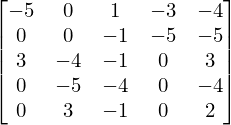

In [81]:
A = sy.randMatrix(5, min=-5, max = 5, percent = 80); A

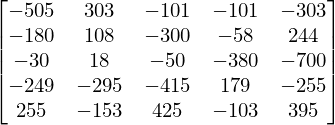

In [82]:
A_adjugate = sy.matrices.MatrixDeterminant.adjugate(A); A_adjugate 

Let's verify if this is really the adjugate of $A$, we pick element of $(1, 3), (2, 4), (5, 4)$

In [84]:
(-1)**(1+3) * sy.matrices.MatrixDeterminant.minor(A, 0, 2) # transpose the index
(-1)**(2+4) * sy.matrices.MatrixDeterminant.minor(A, 3, 1)
(-1)**(5+4) * sy.matrices.MatrixDeterminant.minor(A, 3, 4)

Adjugate is the transpose of cofactor matrix, thus we reverse the row and column index above when referring to the elements in mind.

The ```sy.N()``` is for converting to float approximation, i.e. we don't want to see fractions.

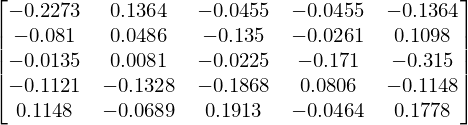

In [89]:
A_det = A.det()
A_inv = (1/A_det)*A_adjugate; round_expr(sy.N(A_inv), 4)

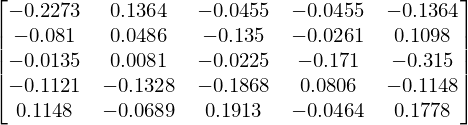

In [90]:
round_expr(sy.N(A.inv()), 4)

We have shown that are the same.

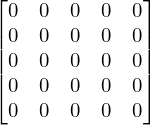

In [91]:
A_inv-A.inv()

## <font face="gotham" color="purple"> The Short Proof

We define $x$ the $j$th column of $A^{-1}$ which satifies
$$
Ax= e_j
$$

and $e_j$ is the $j$th column of identity matrix, and $j$th entry of $x$ is the $(i,j)$-entry of $A^{-1}$.By Cramer's rule,

$$\left\{(i, j) \text { -entry of } A^{-1}\right\}=x_{i}=\frac{\operatorname{det} A_{i}\left(\mathbf{e}_{j}\right)}{\operatorname{det} A}$$

The cofactor expansion down column $i$ of $A_i(e_j)$,
$$\operatorname{det} A_{i}\left(\mathbf{e}_{j}\right)=(-1)^{i+j} \operatorname{det} A_{j i}=C_{j i}$$